In [1]:
# importing the Keras libraries and packages
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Define data generator
datagen = ImageDataGenerator(rescale=1./255)  # Rescale pixel values to [0, 1]

# Define image dimensions and batch size
target_size = (64, 64)
batch_size = 32

# Path to the directory containing subfolders (each representing a class)
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get list of subfolders (classes)
classes = os.listdir(data_dir)

# Dictionary to store the number of images per class
num_images_per_class = {}

# Iterate over each subfolder and count the number of images
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

# Print the number of images in each subfolder
print("Number of images per class:")
for class_name, num_images in num_images_per_class.items():
    print(f"{class_name}: {num_images}")

# Generate batches of image data
train_generator = datagen.flow_from_directory(
    directory=data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',  # Assuming each subfolder represents a different class
    shuffle=True  # Shuffle the data
)

# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)
    
    # Process your images and labels here
    # Example: You can print the shape of images and labels
    print("Shape of images batch:", images.shape)
    print("Shape of labels batch:", labels.shape)
    
    # Example: Break the loop after processing one batch
    break


Number of images per class:
Cat: 414
Cheetah: 398
Leopard: 394
Lion: 409
Tiger: 411
Found 2026 images belonging to 5 classes.
Shape of images batch: (32, 64, 64, 3)
Shape of labels batch: (32, 5)


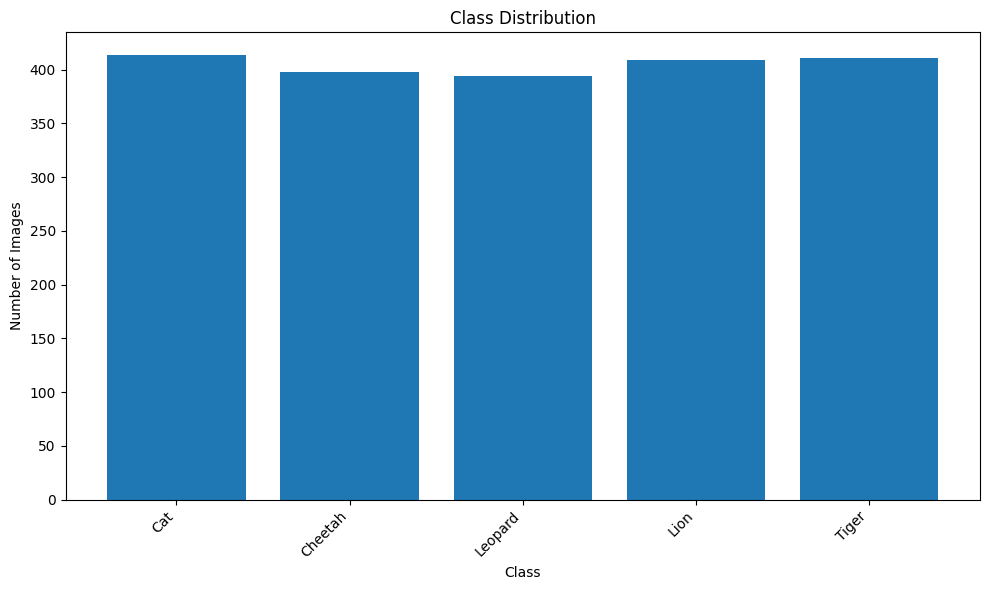

Number of images per class:
Cat: 414
Cheetah: 398
Leopard: 394
Lion: 409
Tiger: 411


In [1]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Dictionary to store the number of images per class
num_images_per_class = {}

# Iterate over each subfolder and count the number of images
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    num_images = len(os.listdir(class_path))
    num_images_per_class[class_name] = num_images

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(num_images_per_class.keys(), num_images_per_class.values())
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.title('Class Distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the number of images in each class
print("Number of images per class:")
for class_name, num_images in num_images_per_class.items():
    print(f"{class_name}: {num_images}")


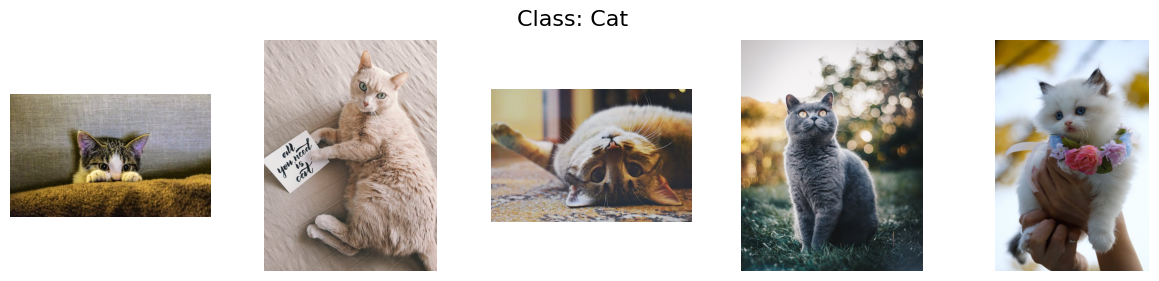

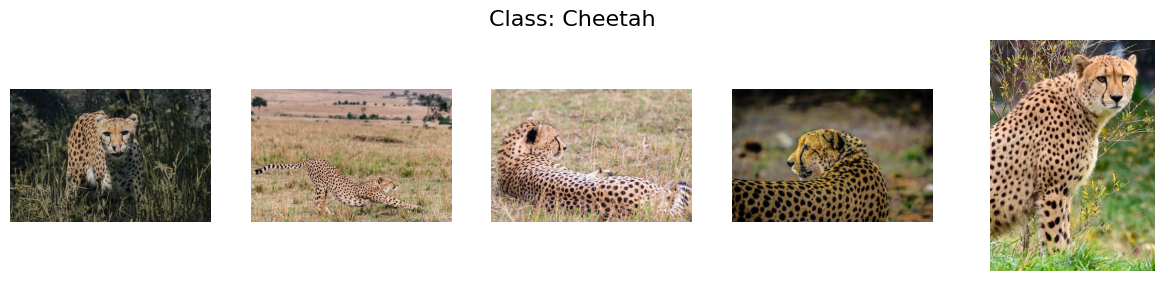

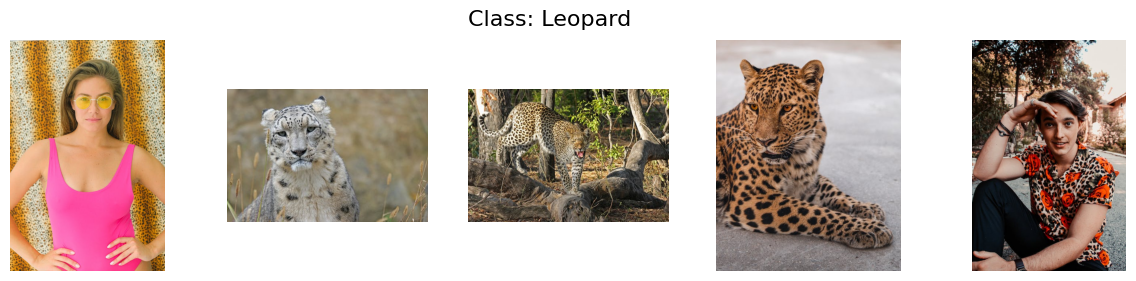

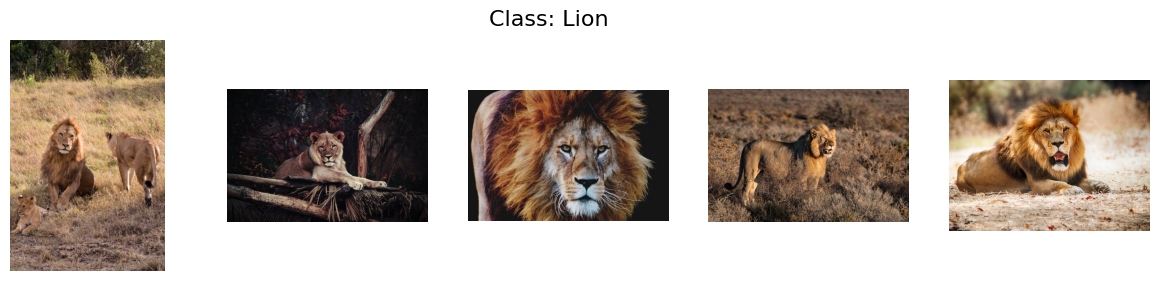

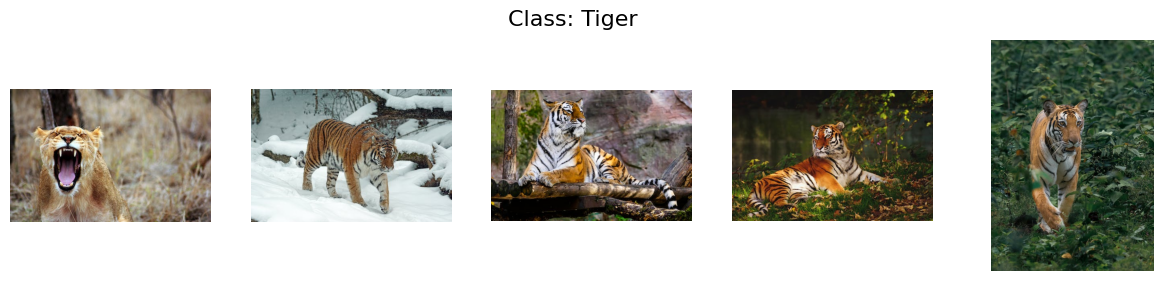

In [2]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset directory
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Define the number of images to visualize per class
num_images_to_visualize = 5

# Iterate over each class and visualize a random sample of images
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)
    
    # Get a list of image files in the class directory
    image_files = os.listdir(class_dir)
    
    # Randomly select a subset of images from the class
    sampled_images = random.sample(image_files, num_images_to_visualize)
    
    # Plot the sampled images in a grid
    plt.figure(figsize=(15, 3))
    plt.suptitle(f"Class: {class_name}", fontsize=16)
    for i, image_file in enumerate(sampled_images):
        # Load and display the image
        image_path = os.path.join(class_dir, image_file)
        image_data = Image.open(image_path)
        plt.subplot(1, num_images_to_visualize, i + 1)
        plt.imshow(image_data)
        plt.axis('off')
    plt.show()


Shape of images batch: (32, 64, 64, 3)


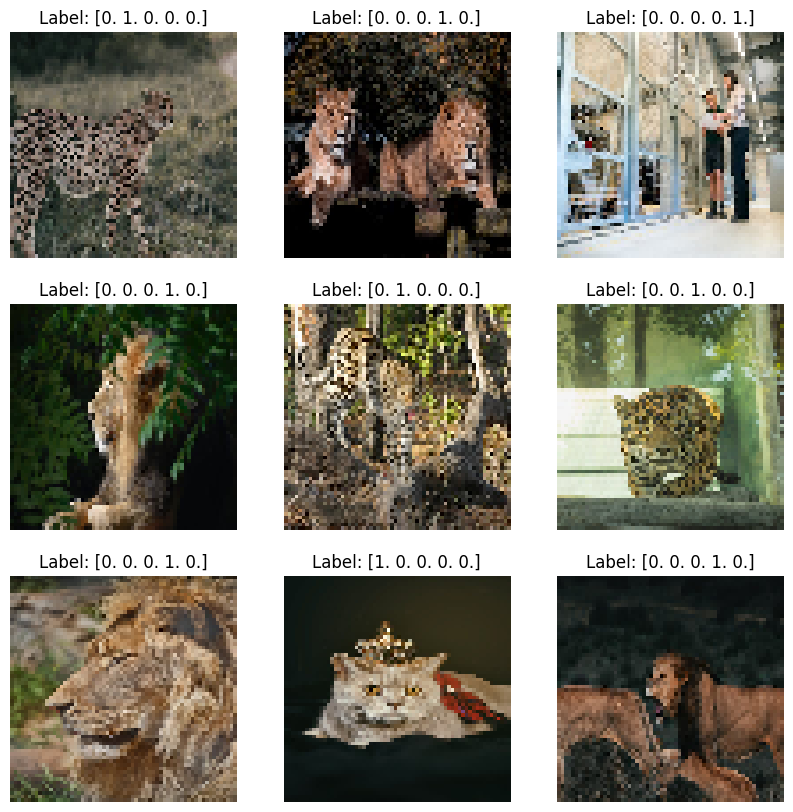

In [3]:
# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)
    
    # Print the shape of the first batch of images
    print("Shape of images batch:", images.shape)
    
    # Visualize a sample of images
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Visualize the first 9 images in the batch
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        plt.title(f"Label: {labels[i]}")
        plt.axis("off")
    plt.show()
    
    # Example: Break the loop after processing one batch
    break


Shape of images batch: (32, 64, 64, 3)


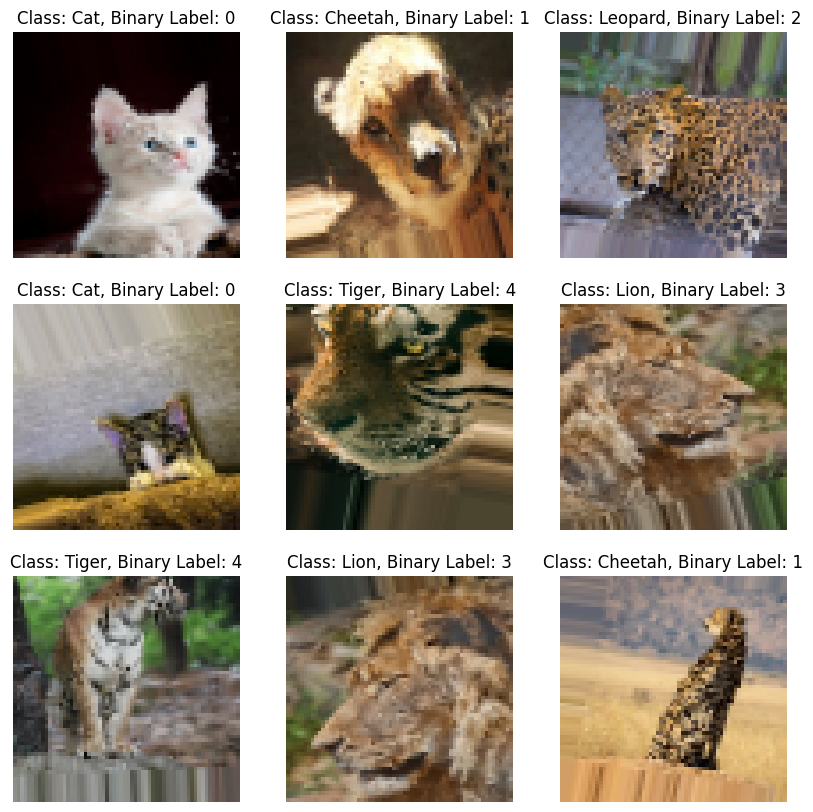

In [40]:
# Access images and labels
for images, labels in train_generator:
    # 'images' is a batch of images with shape (batch_size, 64, 64, 3)
    # 'labels' is an array of corresponding one-hot encoded labels with shape (batch_size, num_classes)
    
    # Get the class names (subfolder names) from the class indices
    class_names = [classes[i] for i in np.argmax(labels, axis=1)]
    
    # Get the binary labels from the one-hot encoded labels
    binary_labels = [np.argmax(label) for label in labels]
    
    # Print the shape of the first batch of images
    print("Shape of images batch:", images.shape)
    
    # Visualize a sample of images along with their class names and binary labels
    import matplotlib.pyplot as plt

    plt.figure(figsize=(10, 10))
    for i in range(9):  # Visualize the first 9 images in the batch
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i])
        class_name = class_names[i]
        binary_label = binary_labels[i]
        plt.title(f"Class: {class_name}, Binary Label: {binary_label}")  # Display class name and binary label
        plt.axis("off")
    plt.show()
    
    # Example: Break the loop after processing one batch
    break


In [3]:
import os
import numpy as np

# Define the path to your dataset directory
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Initialize lists to store image statistics
channel_means = []
channel_stds = []
pixel_value_ranges = []

# Iterate over each class and compute image statistics
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)
    
    # Iterate over the images in the class directory
    for image_file in os.listdir(class_dir):
        # Load the image and convert it to a NumPy array
        image_path = os.path.join(class_dir, image_file)
        image_data = np.array(Image.open(image_path))
        
        # Compute mean and standard deviation for each channel (RGB)
        channel_means.append(np.mean(image_data, axis=(0, 1)))
        channel_stds.append(np.std(image_data, axis=(0, 1)))
        
        # Compute range of pixel values for each channel
        pixel_value_ranges.append((np.min(image_data, axis=(0, 1)), np.max(image_data, axis=(0, 1))))

# Convert lists to NumPy arrays for easier computation
channel_means = np.array(channel_means)
channel_stds = np.array(channel_stds)
pixel_value_ranges = np.array(pixel_value_ranges)

# Compute overall mean and standard deviation across all images and channels
overall_mean = np.mean(channel_means, axis=0)
overall_std = np.mean(channel_stds, axis=0)
overall_pixel_value_range = (np.min(pixel_value_ranges[:, 0]), np.max(pixel_value_ranges[:, 1]))

# Print the computed statistics
print("Overall Image Statistics:")
print(f"Mean pixel values (RGB): {overall_mean}")
print(f"Standard deviation of pixel values (RGB): {overall_std}")
print(f"Pixel value range (RGB): {overall_pixel_value_range}")


Overall Image Statistics:
Mean pixel values (RGB): [116.65840536 106.60323351  88.53491876]
Standard deviation of pixel values (RGB): [54.46393272 50.61660727 48.88544952]
Pixel value range (RGB): (0, 255)


In [ ]:
'''Mean Pixel Values (RGB):
Mean pixel values represent the average intensity of each color channel (Red, Green, Blue) across all images in your dataset.
In your result, the mean pixel values are approximately:
Red channel: 116.66
Green channel: 106.60
Blue channel: 88.53
These values indicate that, on average, the intensity of red pixels is highest, followed by green pixels, and then blue pixels.
Standard Deviation of Pixel Values (RGB):
Standard deviation measures the spread or variability of pixel intensities around the mean value for each color channel.
In your result, the standard deviation of pixel values is approximately:
Red channel: 54.46
Green channel: 50.62
Blue channel: 48.89
These values indicate the variability or diversity of pixel intensities within each channel. Higher standard deviations suggest greater variability in pixel values.
Pixel Value Range (RGB):
Pixel value range specifies the minimum and maximum pixel values observed across all images and channels in your dataset.
In your result, the pixel value range for each channel is from 0 to 255.
This indicates that the pixel intensities range from the minimum value of 0 (black) to the maximum value of 255 (white) for each color channel, covering the full spectrum of possible pixel values. 
'''

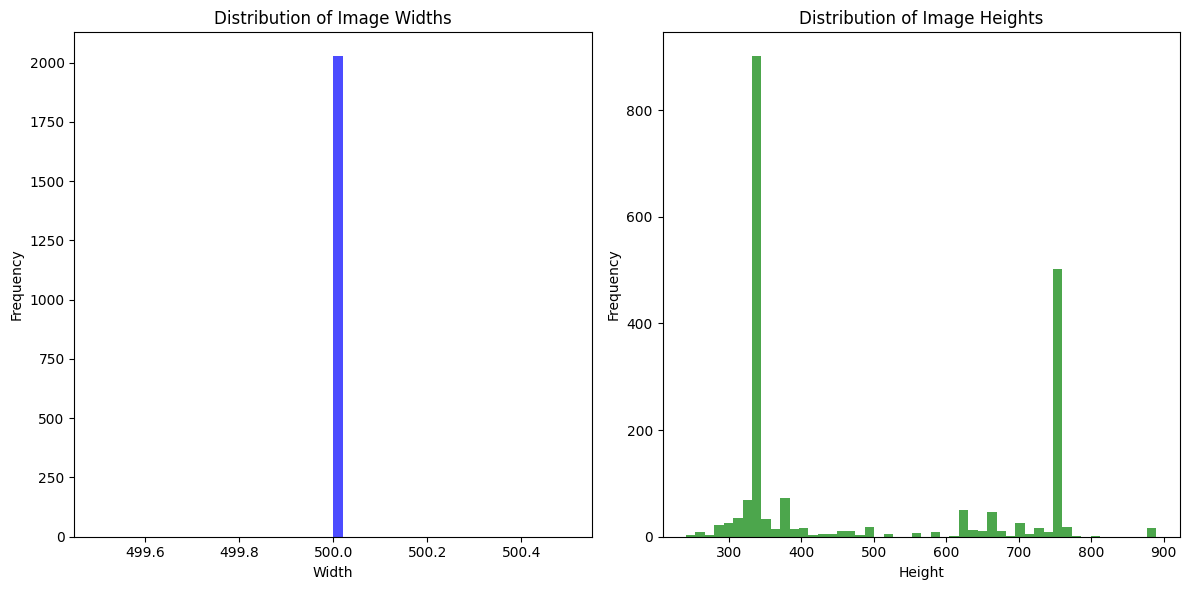

In [4]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset directory
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Initialize lists to store image dimensions
image_widths = []
image_heights = []

# Iterate over the images in the dataset and record their dimensions
for class_name in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, class_name)
    for image_file in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image_file)
        with Image.open(image_path) as img:
            width, height = img.size
            image_widths.append(width)
            image_heights.append(height)

# Plot histograms of image widths and heights
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.hist(image_widths, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Image Widths')
plt.xlabel('Width')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(image_heights, bins=50, color='green', alpha=0.7)
plt.title('Distribution of Image Heights')
plt.xlabel('Height')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


In [ ]:
'''
Depending on the requirements of your deep learning model, you may need to resize images to a fixed size before feeding them into the model.
Some models, such as convolutional neural networks (CNNs), may require input images to have consistent dimensions.
'''

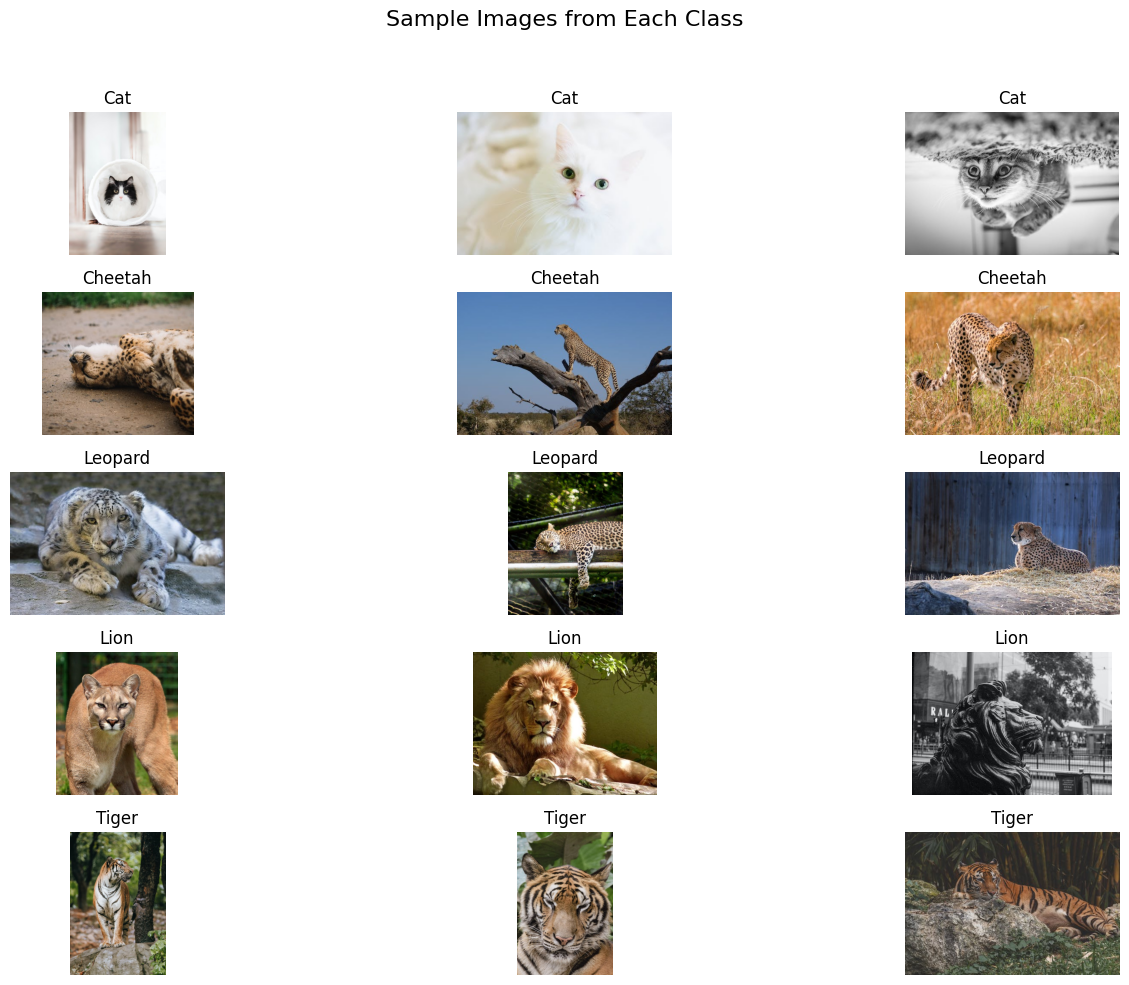

In [5]:
import os
import random
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to your dataset directory
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Define the number of sample images to visualize for each class
num_samples_per_class = 3

# Set up a grid for plotting sample images
plt.figure(figsize=(15, 10))

# Iterate over each class and visualize sample images
for i, class_name in enumerate(classes, start=1):
    class_dir = os.path.join(data_dir, class_name)
    image_files = os.listdir(class_dir)
    sample_images = random.sample(image_files, num_samples_per_class)
    
    # Plot sample images for the current class
    for j, image_file in enumerate(sample_images, start=1):
        image_path = os.path.join(class_dir, image_file)
        img = Image.open(image_path)
        plt.subplot(len(classes), num_samples_per_class, (i-1)*num_samples_per_class + j)
        plt.imshow(img)
        plt.title(class_name)
        plt.axis('off')

plt.suptitle('Sample Images from Each Class', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


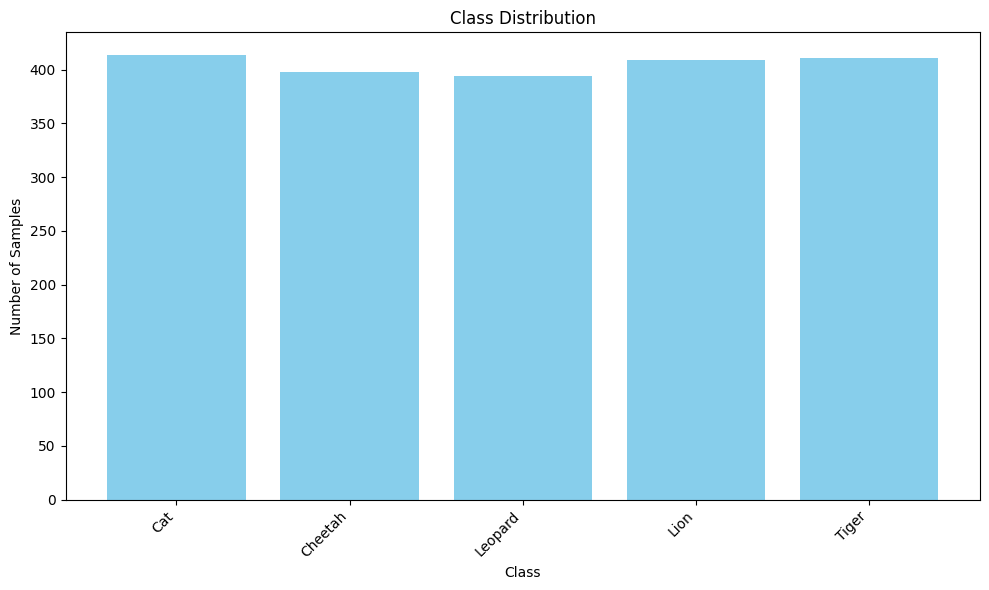

Class Distribution Statistics:
Cat: 414 samples (20.43% of total)
Cheetah: 398 samples (19.64% of total)
Leopard: 394 samples (19.45% of total)
Lion: 409 samples (20.19% of total)
Tiger: 411 samples (20.29% of total)


In [6]:
import os
import matplotlib.pyplot as plt

# Define the path to your dataset directory
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get the list of subfolders (each representing a class)
classes = os.listdir(data_dir)

# Initialize a dictionary to store the number of samples per class
class_counts = {}

# Count the number of samples in each class
for class_name in classes:
    class_dir = os.path.join(data_dir, class_name)
    num_samples = len(os.listdir(class_dir))
    class_counts[class_name] = num_samples

# Compute the total number of samples in the dataset
total_samples = sum(class_counts.values())

# Compute the percentage of samples in each class
class_percentages = {class_name: count / total_samples * 100 for class_name, count in class_counts.items()}

# Plot the class distribution
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Print the class distribution statistics
print("Class Distribution Statistics:")
for class_name, count in class_counts.items():
    percentage = class_percentages[class_name]
    print(f"{class_name}: {count} samples ({percentage:.2f}% of total)")


In [ ]:
'''
Based on the information you've shared, it appears that your dataset has a relatively balanced distribution of samples across the different classes. Each class comprises approximately 20% of the total samples, indicating a similar representation of each category.

Having a balanced class distribution is generally favorable for training machine learning models as it helps prevent biases towards specific classes and ensures that the model learns from a diverse range of examples.
'''

In [65]:
import os
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image dimensions for resizing
img_height, img_width = 64, 64

# Define batch size
batch_size = 32

# Define data generators for preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,            # Normalize pixel values to [0, 1]
    rotation_range=20,         # Rotate images by up to 20 degrees
    width_shift_range=0.2,     # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,    # Shift images vertically by up to 20% of the height
    shear_range=0.2,           # Shear images by up to 20 degrees
    zoom_range=0.2,            # Zoom images by up to 20%
    horizontal_flip=True      # Flip images horizontally
)

# Define the directory containing all the data
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Split the dataset into training and validation sets
train_filenames, validation_filenames = train_test_split(os.listdir(data_dir), test_size=0.2, random_state=42)

# Define data generators for training and validation
train_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training',  # Use the filenames in the training set
    seed=42
)

validation_generator = train_datagen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation',  # Use the filenames in the validation set
    seed=42
)


Found 2026 images belonging to 5 classes.
Found 0 images belonging to 5 classes.


In [62]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Set the parameters for your data
batch_size = 32
image_size = (64, 64)

# Create the training dataset from the 'train' directory
train_ds = image_dataset_from_directory(
    directory='dl-challenge-thomasmore-2023-2024/train/train',
    labels='inferred',
    label_mode='categorical',  # Set label_mode to 'categorical' for multi-class classification
    batch_size=batch_size,
    image_size=image_size,
    seed=123
)

# Create the testing dataset from the 'train' directory
test_ds = image_dataset_from_directory(
    directory='dl-challenge-thomasmore-2023-2024/train/train',
    labels='inferred',
    label_mode='categorical',  # Set label_mode to 'categorical' for multi-class classification
    batch_size=batch_size,
    image_size=image_size,
    seed=123
)
# Ensure the dataset can generate enough batches (so keep on generating when needed)
train_ds = train_ds.repeat()

test_ds = test_ds.repeat()

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xdc in position 30: invalid continuation byte

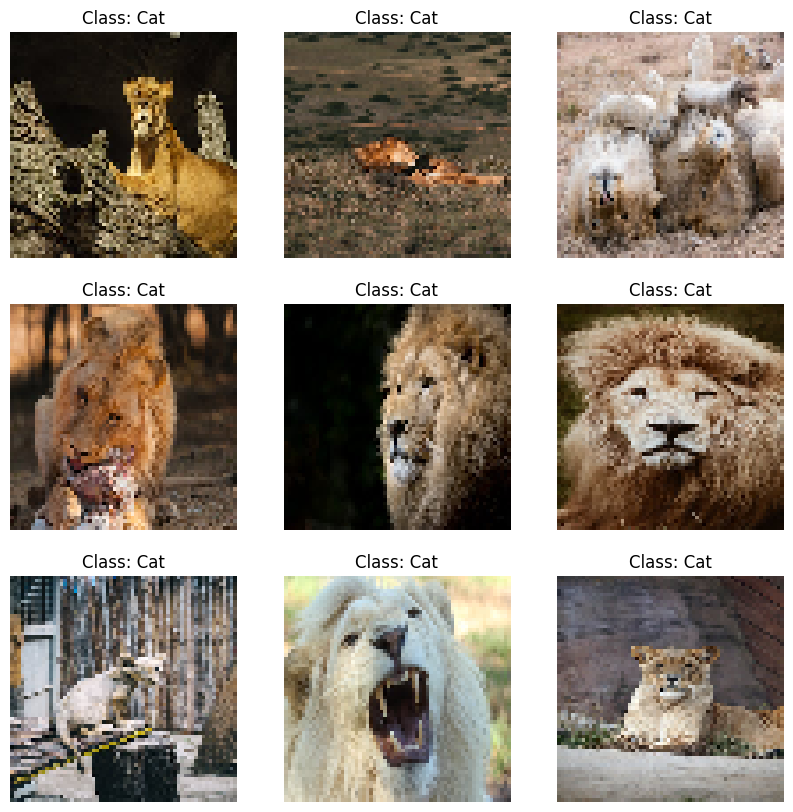

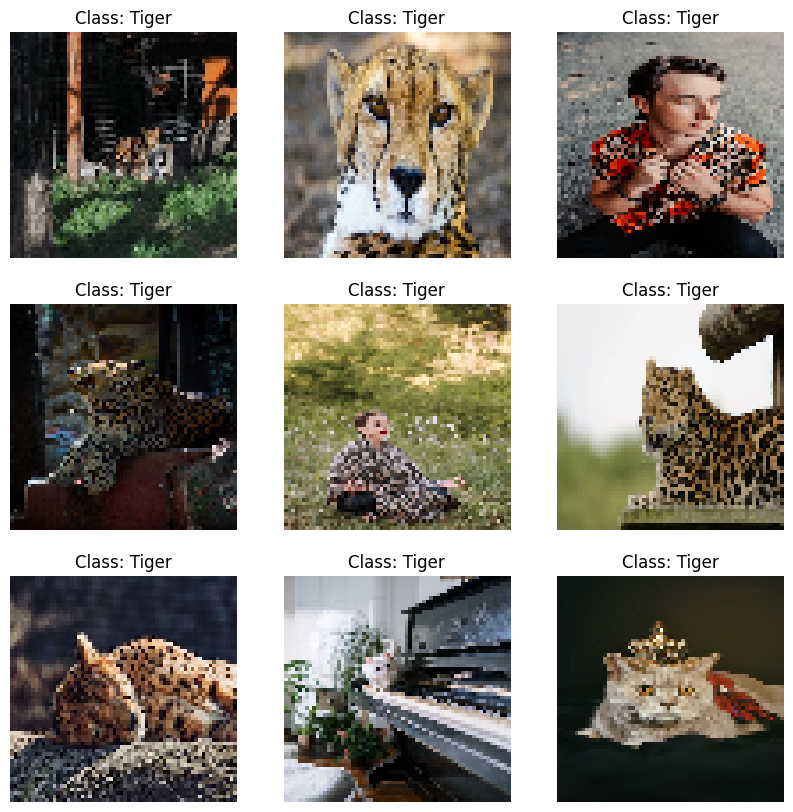

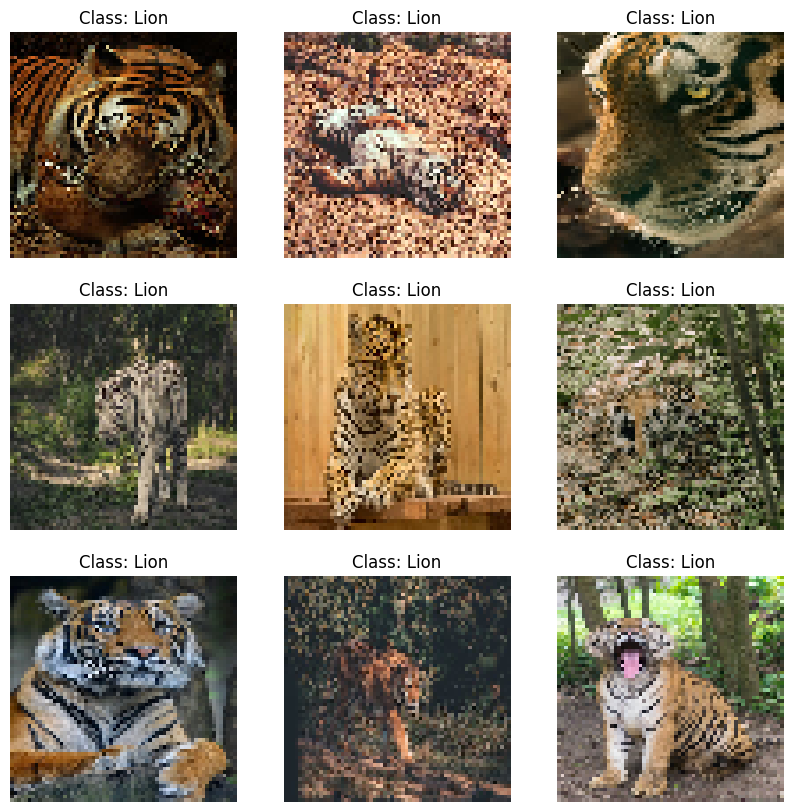

In [4]:
# Visualize a sample of images from different classes
import random

# Get a random sample of class names
sample_classes = random.sample(classes, k=min(len(classes), 3))

# Visualize images from each sampled class
for class_name in sample_classes:
    # Get a batch of images from the class
    class_images = []
    for images, labels in train_generator:
        class_indices = [i for i, label in enumerate(labels) if label[list(labels[0]).index(1)] == 1]
        class_images.extend(images[class_indices])
        if len(class_images) >= 9:  # Visualize 9 images from the class
            break
    
    # Visualize the sampled images
    plt.figure(figsize=(10, 10))
    for i, image in enumerate(class_images[:9]):
        plt.subplot(3, 3, i+1)
        plt.imshow(image)
        plt.title(f"Class: {class_name}")
        plt.axis("off")
    plt.show()


In [5]:
import cv2
import numpy as np

# Define a function to check image quality
def check_image_quality(image):
    # Convert image to grayscale
    grayscale_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Compute the standard deviation of pixel intensities
    std_dev = np.std(grayscale_image)
    
    # Define a threshold for acceptable standard deviation
    threshold = 10  # Adjust as needed
    
    # Check if the standard deviation is below the threshold
    if std_dev < threshold:
        return False  # Image quality is poor
    else:
        return True  # Image quality is acceptable

# Iterate through images and check quality
for images, labels in train_generator:
    for image in images:
        if not check_image_quality(image):
            print("Low quality image detected!")
            # Take appropriate action, such as removing the image or updating its label
            # Example: os.remove(image_path)
            # Note: Replace 'image_path' with the path to the image file
    break  # Only check the first batch


Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!
Low quality image detected!


In [6]:
import os

# Path to the directory containing subfolders (each representing a class)
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get list of subfolders (classes)
classes = os.listdir(data_dir)

# Iterate over each subfolder and check file extensions
for class_name in classes:
    class_path = os.path.join(data_dir, class_name)
    
    # Get list of files in the subfolder
    files = os.listdir(class_path)
    
    # Extract file extensions
    extensions = {os.path.splitext(file)[1] for file in files}
    
    # If there's only one unique extension, all images have the same format
    if len(extensions) == 1:
        print(f"All images in '{class_name}' have the same extension: {extensions.pop()}")
    else:
        print(f"Images in '{class_name}' have multiple extensions: {extensions}")


All images in 'Cat' have the same extension: .jpg
All images in 'Cheetah' have the same extension: .jpg
All images in 'Leopard' have the same extension: .jpg
All images in 'Lion' have the same extension: .jpg
All images in 'Tiger' have the same extension: .jpg


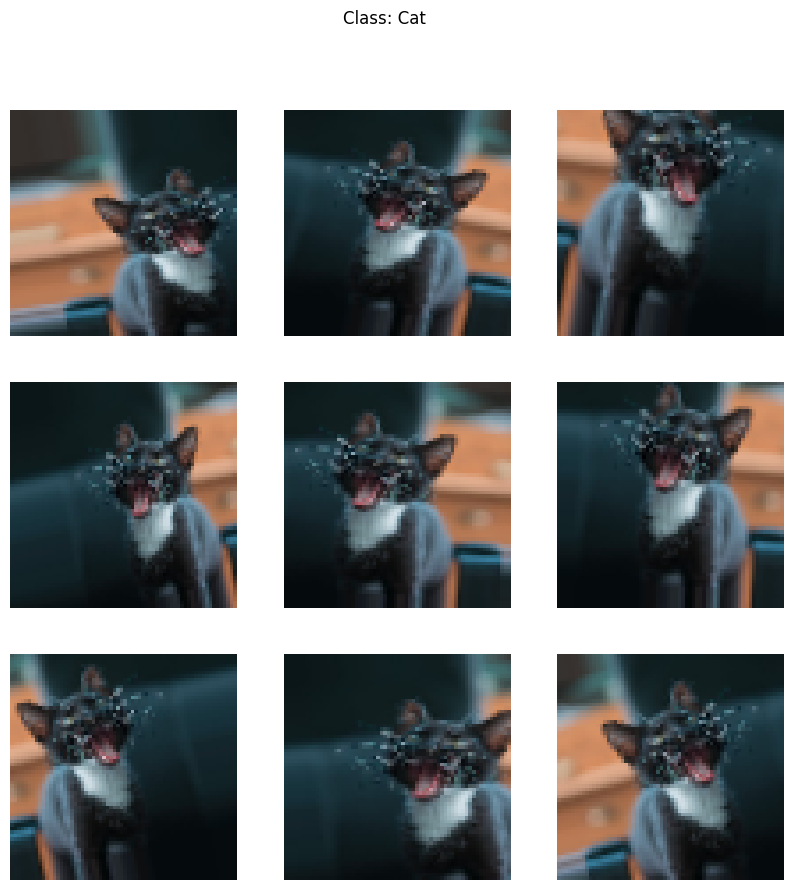

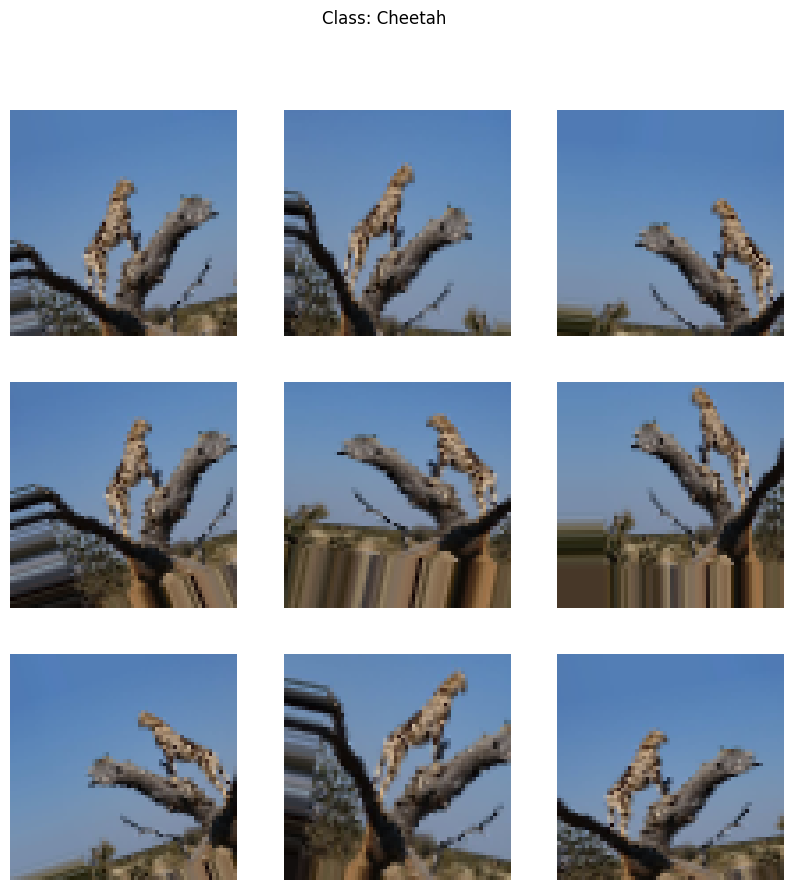

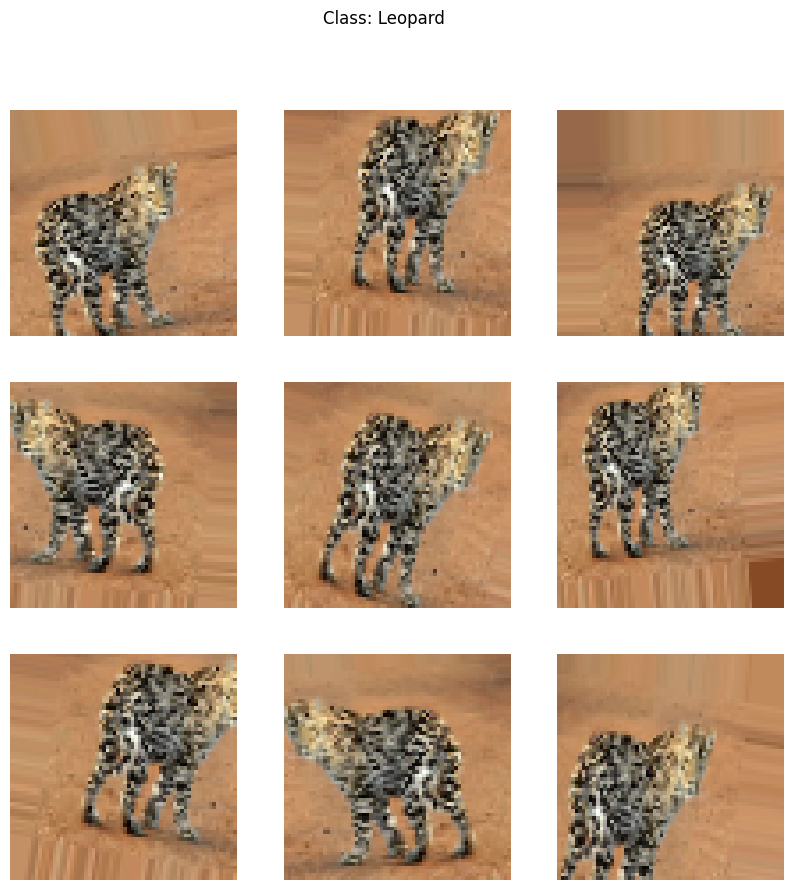

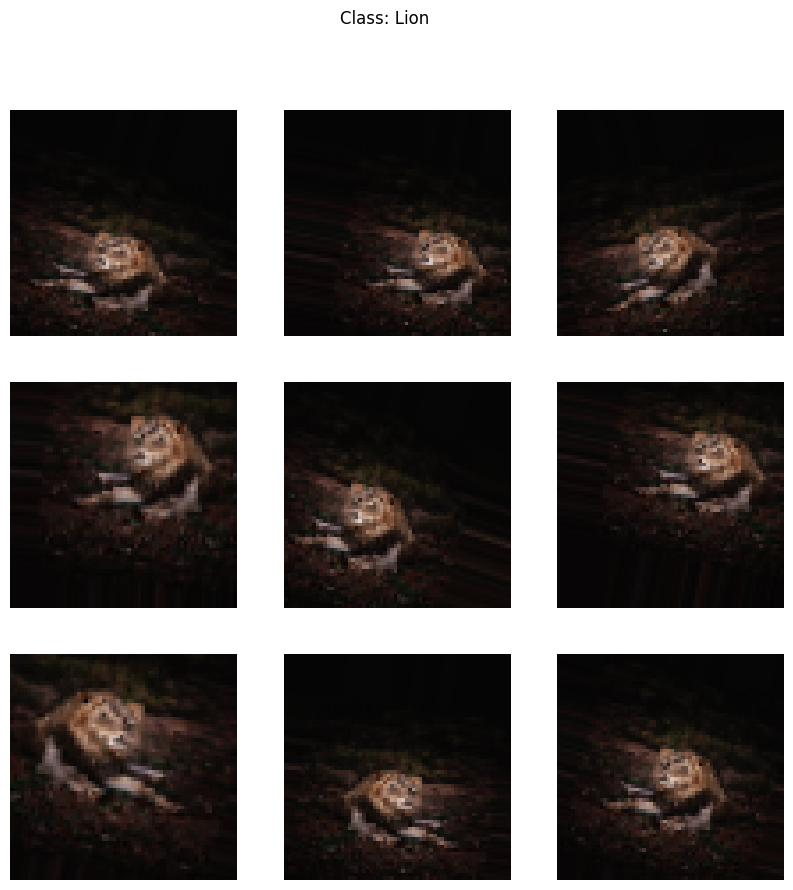

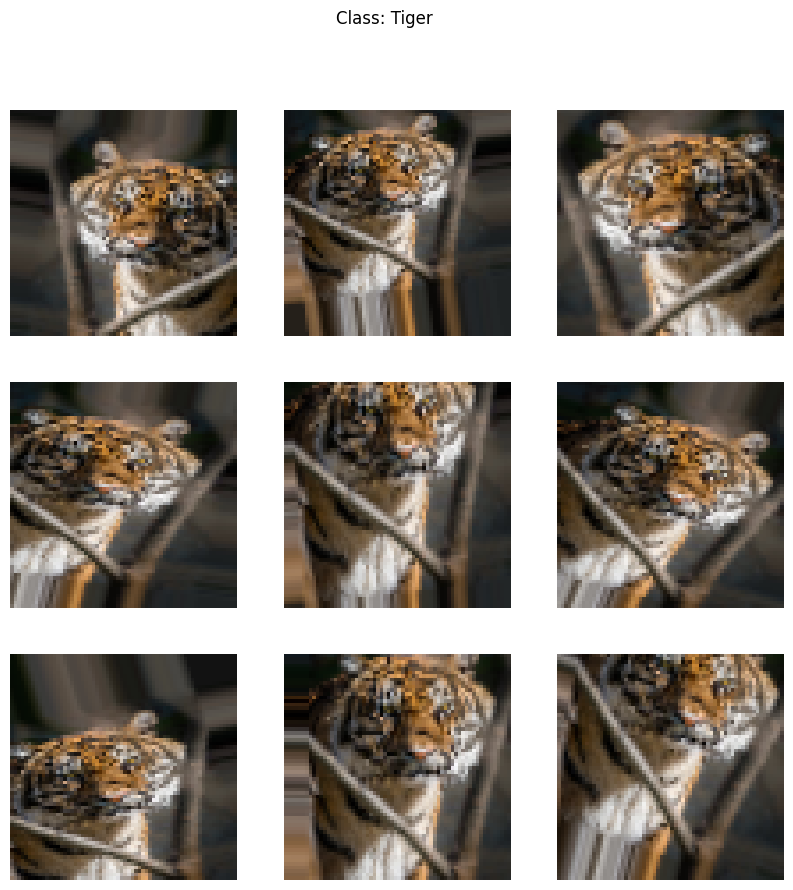

In [7]:
from tensorflow.keras.preprocessing import image

# Define data generator for augmentation
datagen_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,  # Rotate images by up to 20 degrees
    width_shift_range=0.2,  # Shift images horizontally by up to 20% of the width
    height_shift_range=0.2,  # Shift images vertically by up to 20% of the height
    shear_range=0.2,  # Shear images by up to 20 degrees
    zoom_range=0.2,  # Zoom images by up to 20%
    horizontal_flip=True,  # Flip images horizontally
    fill_mode='nearest'  # Fill in missing pixels using the nearest available value
)

# Define the directory containing subfolders (each representing a class)
data_dir = 'dl-challenge-thomasmore-2023-2024/train/train'

# Get list of subfolders (classes)
classes = [class_name for class_name in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, class_name))]

# Iterate over each class and visualize augmented images
for class_name in classes:
    # Construct the directory path for the class
    class_dir = os.path.join(data_dir, class_name)
    
    # Load a sample image from the class directory
    sample_image_path = os.path.join(class_dir, os.listdir(class_dir)[0])
    sample_image = image.load_img(sample_image_path, target_size=(64, 64))
    sample_image = image.img_to_array(sample_image)
    sample_image = sample_image.reshape((1,) + sample_image.shape)  # Add batch dimension
    
    # Visualize augmented images
    plt.figure(figsize=(10, 10))
    i = 0
    for batch in datagen_aug.flow(sample_image, batch_size=1):
        augmented_image = batch[0]
        plt.subplot(3, 3, i+1)
        plt.imshow(augmented_image)
        plt.axis('off')
        i += 1
        if i % 9 == 0:
            break  # Visualize 9 augmented images
    plt.suptitle(f"Class: {class_name}")
    plt.show()


In [12]:
import tensorflow as tf
from tensorflow.keras import layers
NUM_CLASSES = 5
IMG_SIZE = 64

# Create a sequential model with a list of layers
model = tf.keras.Sequential([

  # Add a resizing layer to resize the images to a consistent shape
  layers.Resizing(IMG_SIZE, IMG_SIZE),
  # Add a rescaling layer to rescale the pixel values to the [0, 1] range
  layers.Rescaling(1./255),
  # Add some data augmentation layers to apply random transformations during training
  layers.RandomFlip("horizontal"),
  #layers.RandomShear(0.2),
  layers.RandomZoom(0.2),



  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Conv2D(32, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Dropout(0.2),
  layers.Flatten(), # Or, layers.GlobalAveragePooling2D()
  layers.Dense(128, activation="relu"),
  layers.Dense(NUM_CLASSES, activation="sigmoid")
])

# Compile and train your model as usual
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

print(model.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

None


In [13]:
# Define the number of epochs for training
epochs = 10

# Train the model
history = model.fit(
    train_generator,
    epochs=epochs,
    validation_data=validation_generator
)

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


c:\Users\mdele\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:120: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 160ms/step - accuracy: 0.1873 - loss: 0.5642 - val_accuracy: 0.2019 - val_loss: 0.5054
Epoch 2/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 10s 152ms/step - accuracy: 0.1719 - loss: 0.5022 - val_accuracy: 0.2019 - val_loss: 0.5037
Epoch 3/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 13s 188ms/step - accuracy: 0.2040 - loss: 0.5017 - val_accuracy: 0.1945 - val_loss: 0.5033
Epoch 4/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.2119 - loss: 0.5015 - val_accuracy: 0.2058 - val_loss: 0.5021
Epoch 5/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.2197 - loss: 0.5009 - val_accuracy: 0.2043 - val_loss: 0.5022
Epoch 6/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 178ms/step - accuracy: 0.2258 - loss: 0.4993 - val_accuracy: 0.2236 - val_loss: 0.4978
Epoch 7/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 12s 175ms/step - accuracy: 0.2504 - loss: 0.4961 - val_accuracy: 0.2759 - val_loss: 0.4879
Epoch 8/10
64/64 ━━━━━━━━━━━━━━━━━━━━ 15s 220ms/step - accuracy: 0.2788 - loss: 0.4860 - val_accuracy: 0.319

In [16]:
# Save the trained model
model.save('path_to_save_model.h5')  # Replace 'path_to_save_model.h5' with the desired path to save your model


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.28      0.44       473
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0

    accuracy                           0.28       473
   macro avg       0.20      0.06      0.09       473
weighted avg       1.00      0.28      0.44       473



c:\Users\mdele\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mdele\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\mdele\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capita

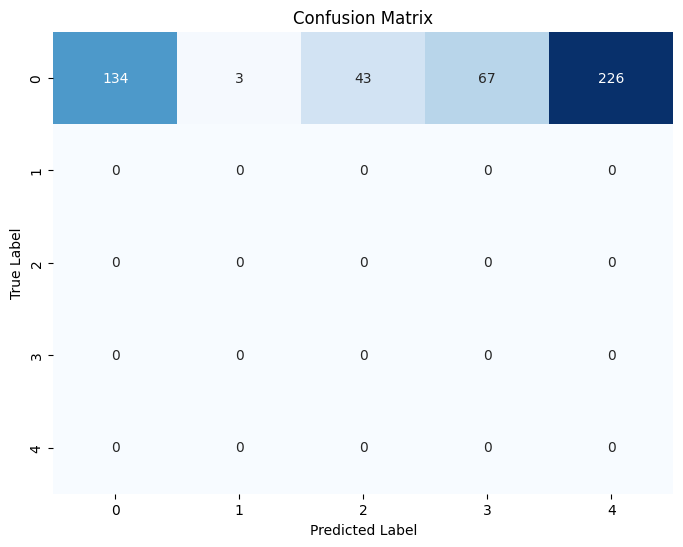

In [15]:
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test set
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes

# Calculate classification report
print("Classification Report:")
print(classification_report(true_classes, predicted_classes))

# Calculate confusion matrix
conf_matrix = confusion_matrix(true_classes, predicted_classes)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


In [28]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('path_to_save_model.h5')  # Replace 'path_to_your_model.h5' with the path to your saved model file

# Preprocess images
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((IMG_SIZE, IMG_SIZE))  # Resize to model's input size
    img = np.array(img) / 255.0  # Rescale pixel values
    return img

# Define the directory containing the images
images_dir = 'dl-challenge-thomasmore-2023-2024/test/test'  # Replace 'path_to_your_images_folder' with the path to your folder containing images

# Iterate through images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        # Construct the full path to the image file
        image_path = os.path.join(images_dir, filename)
        
        # Preprocess the image
        image = preprocess_image(image_path)
        
        # Make predictions
        predictions = model.predict(np.expand_dims(image, axis=0))
        
        # If performing multi-class classification, you can get the predicted class label
        predicted_class = np.argmax(predictions[0])
        
        # If performing binary classification, you can use a threshold to determine the predicted class
        threshold = 0.5  # Adjust as needed
        binary_prediction = 1 if predictions[0][0] > threshold else 0
        
        # Print the filename and the predicted class label or binary prediction
        print(f"Image: {filename}, Predicted Class Label: {predicted_class}, Binary Prediction: {binary_prediction}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Image: 1.jpg, Predicted Class Label: 0, Binary Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: 10.jpg, Predicted Class Label: 0, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: 100.jpg, Predicted Class Label: 0, Binary Prediction: 1
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Image: 101.jpg, Predicted Class Label: 0, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Image: 102.jpg, Predicted Class Label: 3, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Image: 103.jpg, Predicted Class Label: 4, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Image: 104.jpg, Predicted Class Label: 4, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Image: 105.jpg, Predicted Class Label: 0, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
Image: 106.jpg, Predicted Class Label: 4, Binary Prediction: 0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Image: 107.jpg, Predicted Class Label: 3, Binary Predict

In [41]:
import os
import csv
import numpy as np
from PIL import Image
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('path_to_save_model.h5')  # Replace 'path_to_your_model.h5' with the path to your saved model file

# Preprocess images
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((IMG_SIZE, IMG_SIZE))  # Resize to model's input size
    img = np.array(img) / 255.0  # Rescale pixel values
    return img

# Define the directory containing the images
images_dir = 'dl-challenge-thomasmore-2023-2024/test/test'  # Replace 'path_to_your_images_folder' with the path to your folder containing images

# List to store predictions
predictions_list = []

# Iterate through images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        # Construct the full path to the image file
        image_path = os.path.join(images_dir, filename)
        
        # Preprocess the image
        image = preprocess_image(image_path)
        
        # Make predictions
        predictions = model.predict(np.expand_dims(image, axis=0))
        
        # If performing multi-class classification, you can get the predicted class label
        predicted_class = np.argmax(predictions[0])
        
        # If performing binary classification, you can use a threshold to determine the predicted class
        threshold = 0.5  # Adjust as needed
        binary_prediction = 1 if predictions[0][0] > threshold else 0
        
        # Store the filename, predicted class label, and binary prediction
        predictions_list.append([filename, classes[predicted_class], binary_prediction])

# Save predictions to a CSV file
output_file = 'predictions.csv'  # Change the filename as needed
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['Filename', 'Predicted_Class', 'Binary_Prediction'])
    writer.writerows(predictions_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━

In [45]:
import os
import csv
import numpy as np
from PIL import Image
import tensorflow as tf

# Load your trained model
model = tf.keras.models.load_model('path_to_save_model.h5')  # Replace 'path_to_your_model.h5' with the path to your saved model file

# Preprocess images
def preprocess_image(image_path):
    img = Image.open(image_path)
    img = img.resize((IMG_SIZE, IMG_SIZE))  # Resize to model's input size
    img = np.array(img) / 255.0  # Rescale pixel values
    return img

# Define the directory containing the images
images_dir = 'dl-challenge-thomasmore-2023-2024/test/test'  # Replace 'path_to_your_images_folder' with the path to your folder containing images

# List to store predictions
predictions_list = []

# Initialize counter for generating IDs
id_counter = 1

# Iterate through images in the directory
for filename in os.listdir(images_dir):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Filter only image files
        # Construct the full path to the image file
        image_path = os.path.join(images_dir, filename)
        
        # Preprocess the image
        image = preprocess_image(image_path)
        
        # Make predictions
        predictions = model.predict(np.expand_dims(image, axis=0))
        
        # Get the predicted class label
        predicted_class = np.argmax(predictions[0])
        
        # Store the ID and predicted class label
        predictions_list.append([id_counter, predicted_class])
        
        # Increment the counter
        id_counter += 1

# Save predictions to a CSV file
output_file = 'predictions.csv'  # Change the filename as needed
with open(output_file, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['id', 'Predicted_Class'])
    writer.writerows(predictions_list)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━

In [26]:
import os
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define the path to the folder containing the images
folder_path = 'dl-challenge-thomasmore-2023-2024/test'  # Replace 'path_to_image_folder' with the actual path

# List all image files in the folder
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

# Load and preprocess each image
preprocessed_images = []
for image_file in image_files:
    # Load the image using OpenCV or PIL
    image = cv2.imread(image_file)
    # Resize the image to the required dimensions (e.g., 64x64)
    image = cv2.resize(image, (64, 64))
    # Convert the image to array format and normalize pixel values
    image = img_to_array(image) / 255.0  # Assuming images were normalized to [0, 1] during training
    # Append the preprocessed image to the list
    preprocessed_images.append(image)

# Convert the list of preprocessed images to a NumPy array
preprocessed_images = np.array(preprocessed_images)

# Make predictions using the trained model
predictions = model.predict(preprocessed_images)

# Convert predictions to class labels (if applicable)
# (You can use the same method as described in the previous response)

# Print the predictions
print(predictions)


c:\Users\mdele\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


ValueError: math domain error

In [24]:
import os
import pandas as pd

# Define the directory containing the test images
test_dir = 'dl-challenge-thomasmore-2023-2024/test'  # Replace 'path_to_test_images_folder' with the path to your folder containing test images

# Get the list of filenames of the test images
test_filenames = os.listdir(test_dir)

# Generate numerical IDs for the test images (starting from 1)
test_ids = list(range(1, len(test_filenames) + 1))

# Assuming 'predictions' is a list containing the predicted labels or probabilities for each test image
# You need to replace this list with your actual predictions

# Ensure that the number of predictions matches the number of test images
if len(test_filenames) != len(predictions):
    raise ValueError("Number of test images does not match number of predictions")

# Create a DataFrame to store the predictions along with the IDs
submission_df = pd.DataFrame({'ID': test_ids, 'PredictedLabel': predictions})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


ValueError: Number of test images does not match number of predictions

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('dl-challenge-thomasmore-2023-2024/train/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dl-challenge-thomasmore-2023-2024/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2026 images belonging to 5 classes.
Found 473 images belonging to 1 classes.


In [ ]:
# Assuming chardet is already installed

import os
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Function to detect directory path encoding
def get_encoding(path):
  with open(path, 'rb') as f:
    rawdata = f.read()
  return detect(rawdata)['encoding']

# Replace 'your_data_path' with the actual path to your parent training data directory
train_encoding = get_encoding('dl-challenge-thomasmore-2023-2024/train/train')
validation_encoding = get_encoding('dl-challenge-thomasmore-2023-2024/train/train')  # Assuming validation data is also within "train" folder
test_encoding = get_encoding('dl-challenge-thomasmore-2023-2024/test')

# Define hyperparameters
batch_size = 32
image_size = (64, 64)
validation_split = 0.2

# Create training dataset
train_ds = image_dataset_from_directory(
  directory='dl-challenge-thomasmore-2023-2024/train/train',
  labels='inferred',
  label_mode='binary',
  batch_size=batch_size,
  image_size=image_size,
  validation_split=validation_split,
  subset='training',
  seed=123,
  encoding=train_encoding
)

# Create validation dataset (assuming validation data is within "train" folder)
validation_ds = image_dataset_from_directory(
  directory='dl-challenge-thomasmore-2023-2024/train/train',
  labels='inferred',
  label_mode='binary',
  batch_size=batch_size,
  image_size=image_size,
  validation_split=validation_split,
  subset='validation',
  seed=123,
  encoding=validation_encoding
)

# Create testing dataset
test_ds = image_dataset_from_directory(
  directory='dl-challenge-thomasmore-2023-2024/test',
  labels='inferred',
  label_mode='binary',
  batch_size=batch_size,
  image_size=image_size,
  encoding=test_encoding
)

# Ensure datasets can generate enough batches (repeat indefinitely)
train_ds = train_ds.repeat()
validation_ds = validation_ds.repeat()
test_ds = test_ds.repeat()

# Now you can proceed with building your model, training it with train_ds,
# evaluating it with validation_ds, and making predictions on test_ds


In [82]:
# Define the number of epochs for training
epochs = 10

# Train your model
history = model.fit(
    train_ds,
    validation_data=validation_ds,  # Adding validation data
    epochs=epochs
)

# Evaluate your model on the test dataset
test_loss, test_accuracy = model.evaluate(test_ds)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


Epoch 1/10


ValueError: as_list() is not defined on an unknown TensorShape.